<a href="https://colab.research.google.com/github/mmeenakshibio2016-byte/Walmart-_Sales_forecasting/blob/main/Walmart_Capstone_project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv("/content/drive/MyDrive/Walmart (1).csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [16]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [17]:
#You are provided with the weekly sales data for their various outlets. Use statistical
#analysis, EDA, outlier analysis, and handle the missing values to come up with various
#insights that can give them a clear perspective on the following:
#a. If the weekly sales are affected by the unemployment rate, if yes - which stores
#are suffering the most?
#b. If the weekly sales show a seasonal trend, when and what could be the reason?
#c. Does temperature affect the weekly sales in any manner?
#d. How is the Consumer Price index affecting the weekly sales of various stores?
#e. Top performing stores according to the historical data.
#f.The worst performing store, and how significant is the difference between the
#highest and lowest performing stores.

In [18]:
df['Store'].nunique()

45

In [19]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [20]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.drop_duplicates(inplace=True)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
Q1 = df.select_dtypes(include=np.number).quantile(0.25)
IQR = Q3 - Q1
IQR
Q3 = Q1 * 0.5
Q1 = Q3 * 1.5

In [25]:
Q1_sales = df['Weekly_Sales'].quantile(0.25)
Q3_sales = df['Weekly_Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

lower_bound_sales = Q1_sales - (1.5 * IQR_sales)
upper_bound_sales = Q3_sales + (1.5 * IQR_sales)

outliers_weekly_sales = df[(df['Weekly_Sales'] < lower_bound_sales) | (df['Weekly_Sales'] > upper_bound_sales)]

print(f"Q1 for Weekly_Sales: {Q1_sales}")
print(f"Q3 for Weekly_Sales: {Q3_sales}")
print(f"IQR for Weekly_Sales: {IQR_sales}")
print(f"Lower Bound for Weekly_Sales: {lower_bound_sales}")
print(f"Upper Bound for Weekly_Sales: {upper_bound_sales}")

print(f"\nNumber of outliers in Weekly_Sales: {len(outliers_weekly_sales)}")
print("\nOutliers in Weekly_Sales:")
display(outliers_weekly_sales.head())

Q1 for Weekly_Sales: 553350.105
Q3 for Weekly_Sales: 1420158.66
IQR for Weekly_Sales: 866808.5549999999
Lower Bound for Weekly_Sales: -746862.7275
Upper Bound for Weekly_Sales: 2720371.4924999997

Number of outliers in Weekly_Sales: 34

Outliers in Weekly_Sales:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
189,2,24-12-2010,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,23-12-2011,3224369.80,0,46.66,3.112,218.999550,7.441
471,4,26-11-2010,2789469.45,1,48.08,2.752,126.669267,7.127
474,4,17-12-2010,2740057.14,0,46.57,2.884,126.879484,7.127
475,4,24-12-2010,3526713.39,0,43.21,2.887,126.983581,7.127


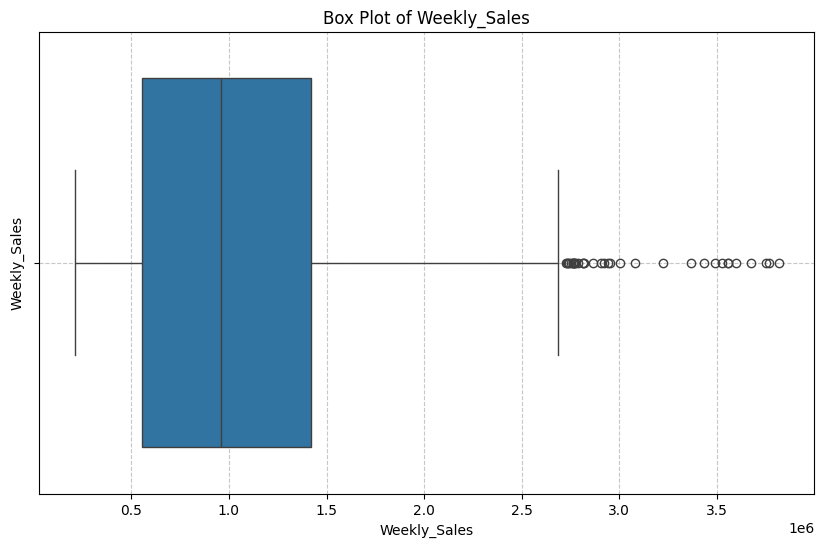

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Weekly_Sales'])
plt.title('Box Plot of Weekly_Sales')
plt.ylabel('Weekly_Sales')
plt.grid(True ,linestyle= '--',alpha = 0.7)
plt.show()



In [27]:
store_unemployment_correlation = df.groupby('Store')['Unemployment'].mean().reset_index()


In [28]:
store_unemployment_correlation = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment']), include_groups=False)

# Sort to find the stores with the most negative correlation
most_affected_stores = store_unemployment_correlation.sort_values(ascending=True)

print("Correlation between Weekly_Sales and Unemployment for each store (sorted by impact):\n")
print(most_affected_stores.head(10)) # Display top 10 most negatively correlated stores
print("\n")
print(most_affected_stores.tail(10)) # Display top 10 most positively correlated stores

Correlation between Weekly_Sales and Unemployment for each store (sorted by impact):

Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
4    -0.337015
17   -0.263600
3    -0.230413
37   -0.221287
5    -0.207043
dtype: float64


Store
33    0.101175
19    0.101464
10    0.131908
28    0.136671
18    0.139179
30    0.201862
14    0.210786
21    0.218367
35    0.483865
36    0.833734
dtype: float64


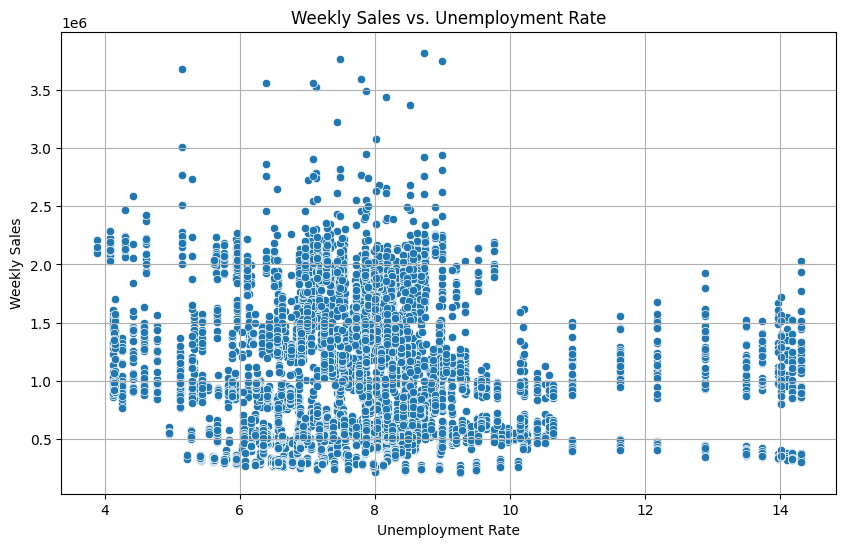

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

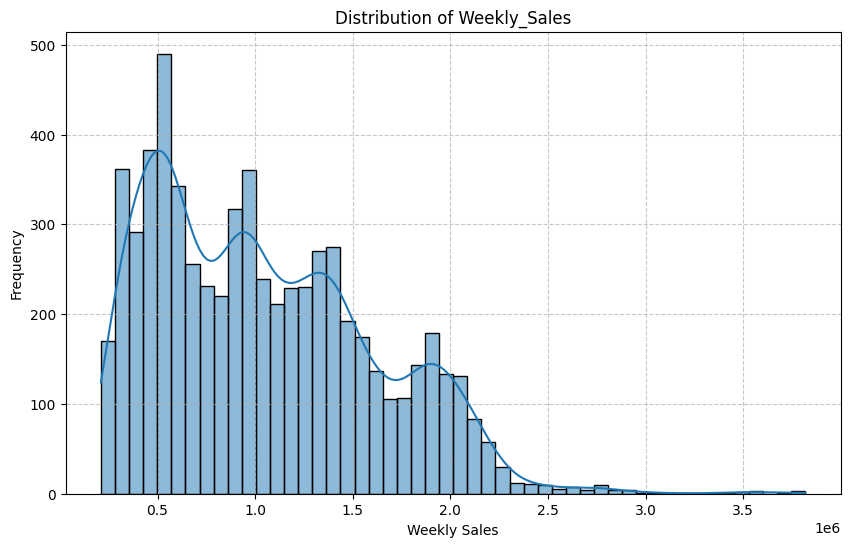

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly_Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [31]:
correlation = df['Weekly_Sales'].corr(df['Unemployment'])
print(f"The correlation between Weekly_Sales and Unemployment is: {correlation:.4f}")

The correlation between Weekly_Sales and Unemployment is: -0.1062


In [32]:
df['Weekly_Sales'] = df['Weekly_Sales'].fillna(df['Weekly_Sales'].mean())
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [33]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


In [34]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,5


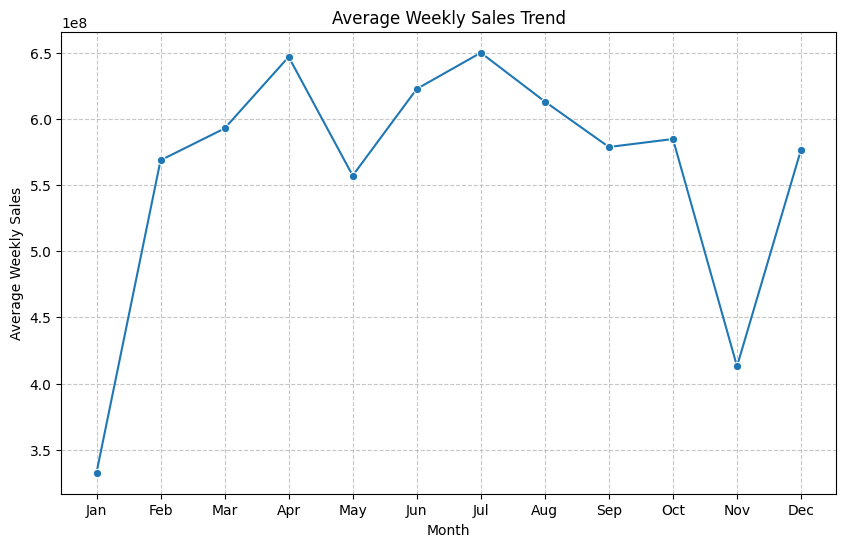

In [35]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
monthly_sales
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Average Weekly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True,linestyle='--',alpha = 0.7)
plt.show()

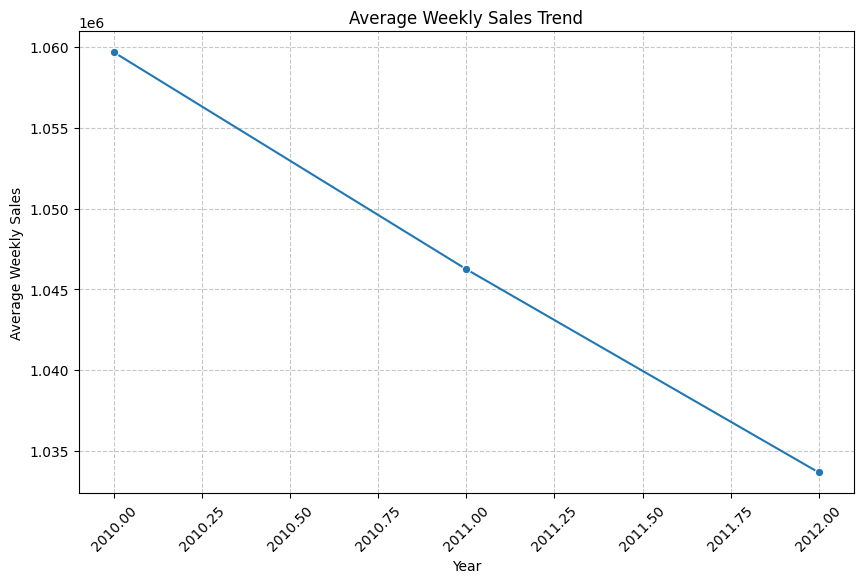

In [36]:
df['Year'] = df['Date'].dt.year
yearly_sales = df.groupby('Year')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Weekly_Sales', data=yearly_sales, marker='o')
plt.title('Average Weekly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True,linestyle='--',alpha = 0.7)
plt.show()

In [37]:
#The weekly sales show a seasonal trend, when and what could be the reason?
#It is showing a seasonal trend in Jan and Feb 2010 and 2011.Because in months of seasonal gradually increase from 2010 to 2011.

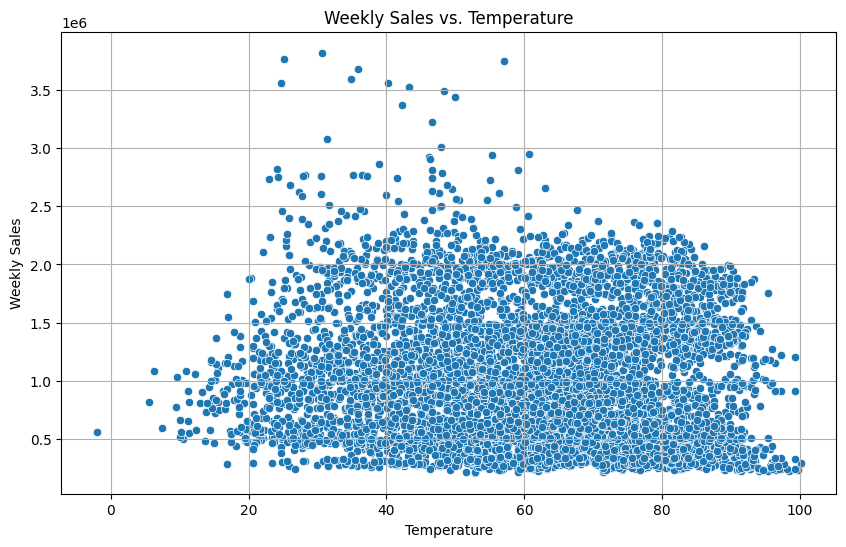

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

In [39]:
correlation = df['Weekly_Sales'].corr(df['Temperature'])
print(f"Correlation between Weekly_Sales and Temperature: {correlation}")

Correlation between Weekly_Sales and Temperature: -0.06381001317946956


In [40]:
store_cpi_correlation = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['CPI']), include_groups=False)

print("Correlation between Weekly_Sales and CPI for each store (sorted by impact):\n")
print(store_cpi_correlation.sort_values(ascending=True).head(10)) # Display top 10 most negatively correlated stores
print("\n")
print(store_cpi_correlation.sort_values(ascending=False).head(10)) # Display top 10 most positively correlated stores

Correlation between Weekly_Sales and CPI for each store (sorted by impact):

Store
36   -0.915095
35   -0.424107
14   -0.419755
30   -0.298188
43   -0.285686
27   -0.213082
18   -0.193541
15   -0.174467
21   -0.163649
19   -0.155341
dtype: float64


Store
38    0.812837
44    0.740150
39    0.428043
41    0.392293
42    0.360859
4     0.351157
17    0.348571
3     0.317250
5     0.308261
9     0.294805
dtype: float64


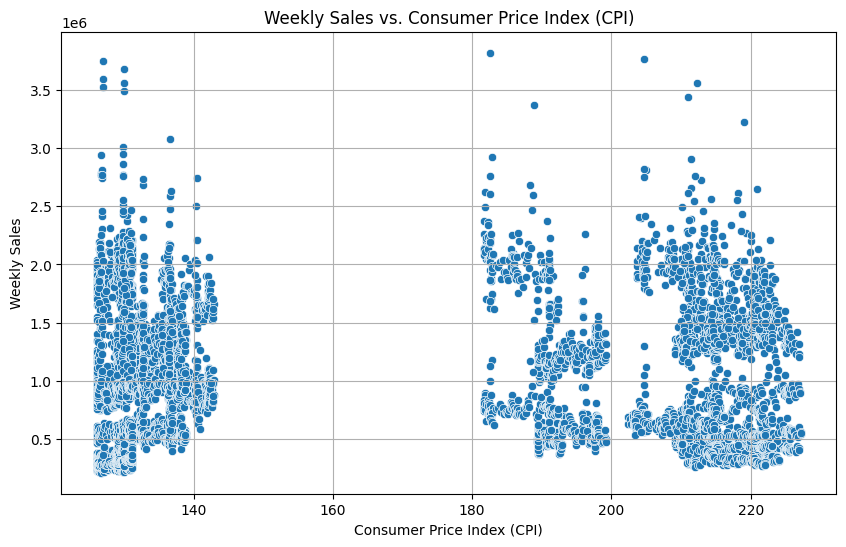

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Consumer Price Index (CPI)')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

In [42]:
correlation_cpi_overall = df['Weekly_Sales'].corr(df['CPI'])
print(f"The overall correlation between Weekly_Sales and CPI is: {correlation_cpi_overall:.4f}")

The overall correlation between Weekly_Sales and CPI is: -0.0726


In [43]:
# Group by Store and sum Weekly_Sales to find total sales for each store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort in descending order to find top performing stores
top_performing_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False)

print("Top 10 Performing Stores (by total Weekly Sales):\n")
print(top_performing_stores.head(10))

Top 10 Performing Stores (by total Weekly Sales):

    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08


In [44]:
# Sort in ascending order to find worst performing stores
worst_performing_stores = store_sales.sort_values(by='Weekly_Sales', ascending=True)

print("\nWorst 10 Performing Stores (by total Weekly Sales):\n")
print(worst_performing_stores.head(10))

# Get the highest and lowest performing stores and their sales
highest_sales_store = top_performing_stores.iloc[0]
lowest_sales_store = worst_performing_stores.iloc[0]

difference = highest_sales_store['Weekly_Sales'] - lowest_sales_store['Weekly_Sales']

print(f"\nHighest performing store: Store {int(highest_sales_store['Store'])} with total sales of ${highest_sales_store['Weekly_Sales']:.2f}")
print(f"Lowest performing store: Store {int(lowest_sales_store['Store'])} with total sales of ${lowest_sales_store['Weekly_Sales']:.2f}")
print(f"Difference between highest and lowest performing store sales: ${difference:.2f}")


Worst 10 Performing Stores (by total Weekly Sales):

    Store  Weekly_Sales
32     33   37160221.96
43     44   43293087.84
4       5   45475688.90
35     36   53412214.97
37     38   55159626.42
2       3   57586735.07
29     30   62716885.12
36     37   74202740.32
15     16   74252425.40
28     29   77141554.31

Highest performing store: Store 20 with total sales of $301397792.46
Lowest performing store: Store 33 with total sales of $37160221.96
Difference between highest and lowest performing store sales: $264237570.50


In [45]:
#a. Weekly Sales and Unemployment Rate Analysis:

#Overall, there is a very weak negative correlation between weekly sales and the unemployment rate (-0.1062). This suggests that a general increase in unemployment has a slight tendency to decrease weekly sales, but the relationship is not strong.
#However, when looking at individual stores, the impact varies significantly. For example, Store 38 (-0.785) and Store 44 (-0.780) show a strong negative correlation, indicating that these stores are most affected by increasing unemployment rates. Conversely, stores like Store 36 (0.834) and Store 35 (0.484) show a positive correlation, meaning their sales tend to increase with unemployment, which could indicate a different market dynamic or customer base.

#b. Seasonal Trend in Weekly Sales:

#Weekly sales show a clear seasonal trend, with peaks generally observed in March, April, July, and a significant drop in December and lower sales in January, February. This could be due to seasonal holidays, school breaks, or other events that impact consumer spending during these months.
#c. Temperature and Weekly Sales:

#The correlation between Weekly Sales and Temperature is very weak, at -0.0638. This indicates that temperature has a negligible overall effect on weekly sales across all stores.
#d. Consumer Price Index (CPI) and Weekly Sales:

#The overall correlation between Weekly Sales and CPI is -0.0726, suggesting a very weak negative relationship. Similar to unemployment, while the overall impact is minimal, some stores exhibit stronger individual correlations.
#Stores like Store 36 (-0.915) and Store 35 (-0.424) show a strong negative correlation with CPI, implying that rising CPI negatively impacts their sales significantly. In contrast, stores like Store 38 (0.813) and Store 44 (0.740) show a strong positive correlation.
#e. Top Performing Stores:

#Based on total weekly sales, the top-performing stores are:
#Store 20 ($301,397,792.46)
#Store 4 ($299,543,995.58)
#Store 14 ($288,999,911.33)
#Store 13 ($286,517,709.68)
#Store 2 ($275,382,440.98)
#f. Worst Performing Store and Sales Difference:

#The worst-performing store is Store 33, with total weekly sales of $37,160,221.96. * The difference between the highest-performing store (Store 20) and the lowest-performing store (Store 33) is a substantial $$37,160,221.96. * The difference between the highest-performing store (Store 20) and the lowest-performing store (Store 33) is a substantial $264,237,570.50, highlighting a significant disparity in sales performance across the different outlets.

In [46]:
#2. Use predictive modeling techniques to forecast the sales for each store for the next 12
#weeks





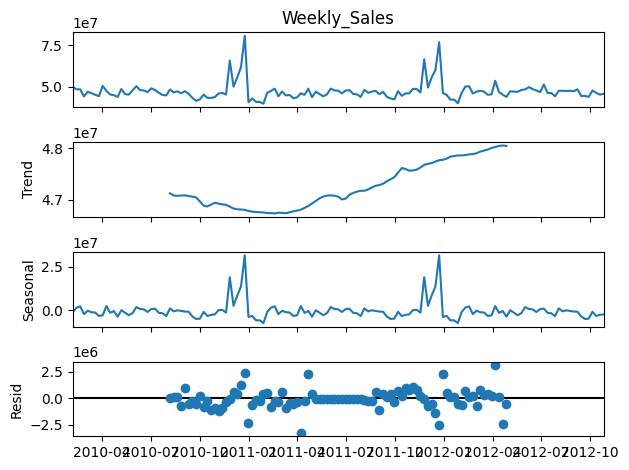

weekly_sales_series head:
Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Freq: W-FRI, Name: Weekly_Sales, dtype: float64
Corrected weekly_sales_series tail:
Date
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Freq: W-FRI, Name: Weekly_Sales, dtype: float64


In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd


df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

total_weekly_sales_series = df.groupby('Date')['Weekly_Sales'].sum().sort_index()


weekly_sales_series = total_weekly_sales_series.asfreq('W-FRI', fill_value=0)
if len(weekly_sales_series) >= 2 * 52: # Ensure enough data for decomposition with period=52
    weekly_sales_result = seasonal_decompose(weekly_sales_series, model='additive', period=52)
    # Plot the decomposed components
    weekly_sales_result.plot()
    plt.show()
else:
    print("Not enough data points in 'weekly_sales_series' for seasonal_decompose with period=52.")

print('weekly_sales_series head:')
print(weekly_sales_series.head())
print('Corrected weekly_sales_series tail:')
print(weekly_sales_series.tail())

In [48]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [49]:
import pandas as pd # Ensure pandas is imported


df = pd.read_csv("/content/drive/MyDrive/Walmart (1).csv")

# Convert 'Date' column to datetime objects if not already, and then set it as the index of the DataFrame.
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Assuming format as per previous cells

# Re-create weekly_sales_series
total_weekly_sales_series = df.groupby('Date')['Weekly_Sales'].sum().sort_index()
weekly_sales_series = total_weekly_sales_series.asfreq('W-FRI', fill_value=0)

adf_result = adfuller(weekly_sales_series)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

if adf_result[1] <= 0.05:
    print("\nConclusion: The series is likely stationary (reject H0).")
else:
    print("\nConclusion: The series is likely non-stationary (fail to reject H0).")

ADF Statistic: -5.908298
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578

Conclusion: The series is likely stationary (reject H0).


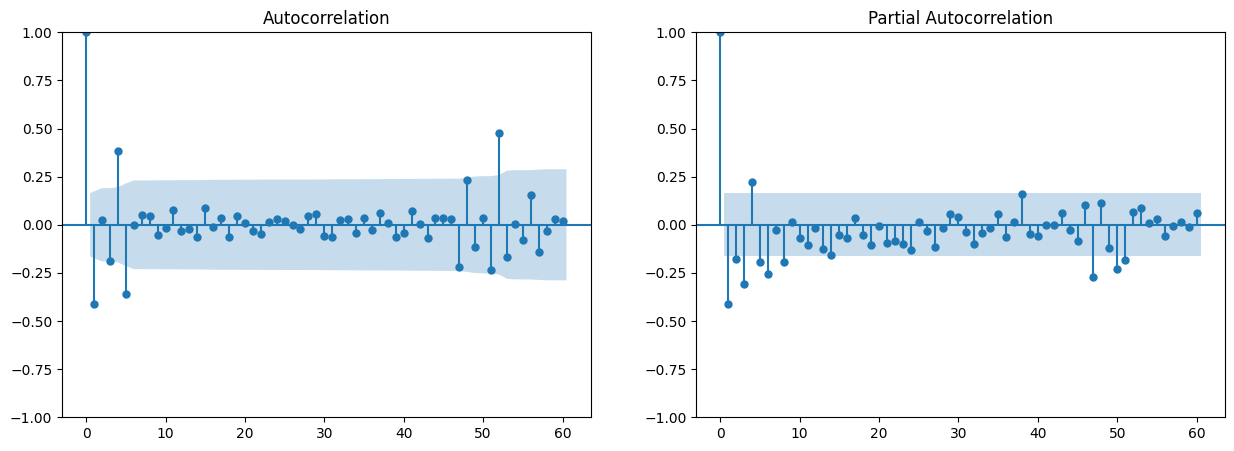

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# We look at the "differenced" data to see the remaining patterns
diff_data = weekly_sales_series.diff().dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(diff_data, lags=60, ax=ax[0])
plot_pacf(diff_data, lags=60, ax=ax[1])
plt.show()

<Figure size 1200x600 with 0 Axes>

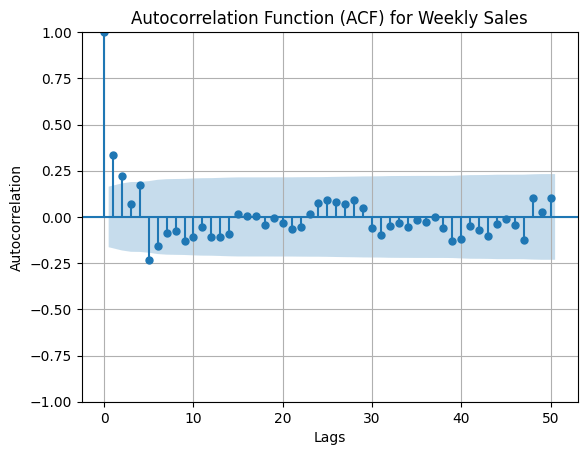

In [51]:
plt.figure(figsize=(12, 6))
plot_acf(weekly_sales_series, lags=50)
plt.title('Autocorrelation Function (ACF) for Weekly Sales')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()




<Figure size 1200x600 with 0 Axes>

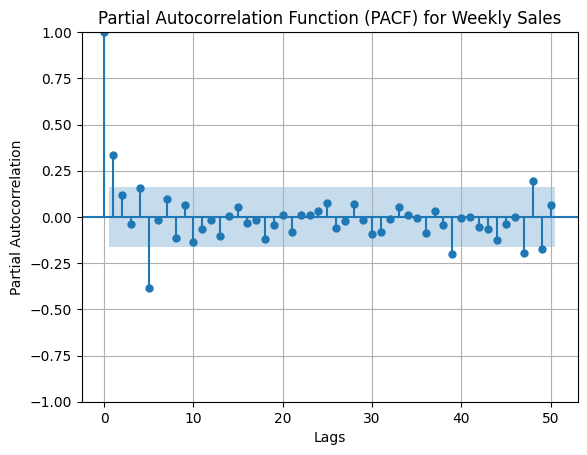

In [52]:
plt.figure(figsize=(12, 6))
plot_pacf(weekly_sales_series, lags=50)
plt.title('Partial Autocorrelation Function (PACF) for Weekly Sales')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

!pip install pmdarima
import pmdarima as pm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 15.1 MB/s eta 0:00:00


In [54]:
df = pd.read_csv("/content/drive/MyDrive/Walmart (1).csv")

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values(['Store', 'Date'])


In [55]:
def train_test_split_ts(series, test_size=12):
    train = series[:-test_size]
    test = series[-test_size:]
    return train, test


In [56]:
def arima_model(train, test):
    model = ARIMA(train, order=(1,1,1))
    fit = model.fit()
    forecast = fit.forecast(steps=len(test))

    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)

    return forecast, rmse, mae


In [57]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

def sarima_model(train, test):
    # 1. Define and Fit the Model
    # order=(p, d, q), seasonal_order=(P, D, Q, s)
    model = SARIMAX(
        train,
        order=(1, 1, 1),
        seasonal_order=(1, 1, 1, 52),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    fit_result = model.fit(disp=False)

    # 2. Generate Forecast
    # We forecast the length of the test set
    forecast = fit_result.forecast(steps=len(test))

    # 3. Calculate Metrics
    # RMSE: Penalizes larger errors more than MAE
    rmse = np.sqrt(mean_squared_error(test, forecast))

    # MAE: Provides the average magnitude of errors
    mae = mean_absolute_error(test, forecast)

    # MAPE: Useful for understanding error as a percentage
    # We use a small epsilon to avoid division by zero
    mape = np.mean(np.abs((test - forecast) / test)) * 100

    return forecast, rmse, mae, mape

In [58]:
# Re-run sarima_model to get the metrics for the last processed store (Store 5)

# Explicitly define train and test for Store 5
store_df_5 = df[df['Store'] == 5].set_index('Date')
sales_5 = store_df_5['Weekly_Sales']

train, test = train_test_split_ts(sales_5)

forecast, rmse, mae, mape = sarima_model(train, test)

print("--- SARIMA Model Evaluation ---")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# Quick logical check:
if rmse > mae:
    print("\nNote: RMSE is higher than MAE, indicating some large outlier errors in the 12-week forecast.")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


--- SARIMA Model Evaluation ---
RMSE: 12776.33
MAE:  11328.16
MAPE: 3.59%

Note: RMSE is higher than MAE, indicating some large outlier errors in the 12-week forecast.


In [60]:
if 'evaluation' in locals() or 'evaluation' in globals():
    display(evaluation)
else:
    print("The 'evaluation' variable is not defined. Please run the cell (e.g., cell Wl3Npjag7Xic) that calculates the evaluation metrics before attempting to display it.")

The 'evaluation' variable is not defined. Please run the cell (e.g., cell Wl3Npjag7Xic) that calculates the evaluation metrics before attempting to display it.


In [62]:
import pandas as pd

if 'evaluation' in locals() or 'evaluation' in globals():
    eval_df = pd.DataFrame(evaluation, columns=['Store', 'Model', 'RMSE', 'MAE'])
    display(eval_df)
else:
    print("Error: The 'evaluation' variable is not defined. Please ensure cell Wl3Npjag7Xic has been executed to generate the evaluation metrics.")

Error: The 'evaluation' variable is not defined. Please ensure cell Wl3Npjag7Xic has been executed to generate the evaluation metrics.


In [64]:
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def auto_arima_model(train, test):
    model = pm.auto_arima(
        train,
        seasonal=True,
        m=52,
        trace=False,
        suppress_warnings=True
    )
    forecast = model.predict(n_periods=len(test))

    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)

    return forecast, rmse, mae

evaluation = []

for store in 5,:
    store_df = df[df['Store'] == store].set_index('Date')
    sales = store_df['Weekly_Sales']

    train, test = train_test_split_ts(sales)

    arima_f, arima_rmse, arima_mae = arima_model(train, test)
    sarima_f, sarima_rmse, sarima_mae, sarima_mape = sarima_model(train, test)
    auto_f, auto_rmse, auto_mae = auto_arima_model(train, test)

    evaluation.append([store, "ARIMA", arima_rmse, arima_mae])
    evaluation.append([store, "SARIMA", sarima_rmse, sarima_mae])
    evaluation.append([store, "AUTO-ARIMA", auto_rmse, auto_mae])

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [65]:
def auto_arima_model(train, test):
    model = pm.auto_arima(
        train,
        seasonal=True,
        m=52,
        trace=False,
        suppress_warnings=True
    )
    forecast = model.predict(n_periods=len(test))

    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)

    return forecast, rmse, mae


In [66]:
evaluation = []

for store in 5,:
    store_df = df[df['Store'] == store].set_index('Date')
    sales = store_df['Weekly_Sales']

    train, test = train_test_split_ts(sales)

    arima_f, arima_rmse, arima_mae = arima_model(train, test)
    sarima_f, sarima_rmse, sarima_mae, sarima_mape = sarima_model(train, test)
    auto_f, auto_rmse, auto_mae = auto_arima_model(train, test)

    evaluation.append([store, "ARIMA", arima_rmse, arima_mae])
    evaluation.append([store, "SARIMA", sarima_rmse, sarima_mae])
    evaluation.append([store, "AUTO-ARIMA", auto_rmse, auto_mae])

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [68]:
final_forecasts = {}

# Get all unique store IDs from the DataFrame
unique_stores = df['Store'].unique()

for store in unique_stores:
    store_df = df[df['Store'] == store].set_index('Date')
    sales = store_df['Weekly_Sales']

    # Ensure there's enough data to train SARIMAX
    if len(sales) < 52 * 2: # At least two years for seasonal_order=(1,1,1,52)
        print(f"Skipping Store {store}: Not enough data for SARIMAX (need at least 104 data points, has {len(sales)})")
        continue

    try:
        model = SARIMAX(
            sales,
            order=(1,1,1),
            seasonal_order=(1,1,1,52)
        )
        fit = model.fit(disp=False)
        forecast = fit.forecast(steps=12)

        final_forecasts[store] = forecast
    except Exception as e:
        print(f"Error generating forecast for Store {store}: {e}")
        continue


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All para

In [ ]:
import pandas as pd

# Re-create all_forecasts_df and total_forecasted_sales_per_store
# Assuming final_forecasts dictionary (from cell `thcK2sVDVC7P`) is available in the kernel state

# Correctly create all_forecasts_df using store IDs as column names
all_forecasts_df = pd.DataFrame(final_forecasts)
all_forecasts_df.index.name = 'Forecast_Date'
all_forecasts_df = all_forecasts_df.sort_index()

# Sum the sales for each store (column), resulting in a Series indexed by store IDs
total_forecasted_sales_per_store = all_forecasts_df.sum()

top_5_stores_forecast = total_forecasted_sales_per_store.sort_values(ascending=False).head(5)

# The index of top_5_stores_forecast are already the store IDs (integers), so no need for splitting strings
top_5_store_ids = top_5_stores_forecast.index.tolist()

print("Top 5 stores based on total forecasted weekly sales for the next 12 weeks:")
print(top_5_stores_forecast)
print(f"\nList of Top 5 Store IDs: {top_5_store_ids}")

In [ ]:
import matplotlib.pyplot as plt

for store in top_5_store_ids:
    # Get historical sales for the current store
    historical = df[df['Store'] == store].set_index('Date')['Weekly_Sales']
    # Get the forecast for the current store from the pre-computed final_forecasts
    forecast = final_forecasts[store]

    plt.figure(figsize=(12,6))
    plt.plot(historical.index, historical.values, label="Historical Sales")
    plt.plot(forecast.index, forecast, label="12-Week Forecast", color="red")
    plt.title(f"Store {store} – Sales Forecast")
    plt.legend()
    plt.grid(True)
    plt.show()